In [2]:
# import of required packages
from nansat import Nansat, Domain
import os
from glob import glob
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create new geolocation for MODIS-a image
def geolocation(mfile, domain, final_path=None):
    print mfile
    n = Nansat(mfile, GCP_COUNT=70)
    # Remove geolocation
    n.vrt.remove_geolocationArray()
    n.vrt.tps = True
    n.reproject_GCPs()
    print n.time_coverage_start

    # add index of pixels
    index = np.arange(0, n.shape()[0] * n.shape()[1]).reshape(n.shape()).astype('int32')
    n.add_band(index, parameters={'name': 'index'})

    n.reproject(domain, addmask=False)
    #bands = ['Rrs_412', 'Rrs_443', 'Rrs_488', 'Rrs_531', 'Rrs_547', 'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678', 'angstrom', 'aot_869', 'chlor_a']
    #bands = ['Rrs_667', 'Rrs_555', 'Rrs_488', 'Rrs_443', 'Rrs_412']
    bands = ['index', 'Rrs_412', 'Rrs_443', 'Rrs_488', 'Rrs_531', 'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678']

    nexp = Nansat(domain=domain)
    for band in bands:
        print band,
        bandArray = n[band]
        print bandArray.dtype
        nexp.add_band(bandArray, parameters={'name': band})
    if final_path:
        nexp.export(os.path.join(final_path, os.path.split(mfile)[1] + postfix))
    else:
        return nexp
        
geolocation = np.vectorize(geolocation)

In [5]:
# A path to store of MODISa data
mfile_root = '/data/MODISa/LAC_OC/'
# A path to accumulation of reprojected files
save_path = '/data/reprojected_data/MODISa/'
# postfix to identification of reprojected files
postfix = '_reprojected.nc'

# Get data list (list of filenames)
mfiles_list = np.array(glob(os.path.join(mfile_root, 'A*.nc')))

# Sandy Bear Dunes domain. For view follow ./requirements/michigan.geojson
pixel_size = 60 # pixel size in m
# x_resol, y_resol = 122 * (1000 / 60), 78 * (1000 / 60) # size in km
x_resol, y_resol = 122, 78
sbd_dom = Domain('+proj=latlong +datum=WGS84 +ellps=WGS84 +no_defs', '-lle -86.3 44.6 -85.2 45.3 -ts %i %i' % (x_resol, y_resol))

In [39]:
# Concatenation of dataset info from MODISa, Sentinel-2a and Sentinel-3 sensors
# Paths to root directories for each sensor:
M_DATA_PATH = '/data/MODISa/LAC_OC'
S2_DATA_PATH = '/data/sentinel2a'
S3_DATA_PATH = '/data/sentinel3'


mfiles_list = np.array(glob(os.path.join(mfile_root, 'A*.nc')))

data_info = pd.DataFrame({'Path to file': mfiles_list})
dates = []
for index, row in data_info.iterrows():
    f = os.path.split(row['Path to file'])[-1]
    f_year, f_day = int(f[1:5]), int(f[5:8])
    f_date = datetime.date(f_year, 1, 1) + datetime.timedelta(f_day - 1)
    dates.append(f_date)

# data_info = data_info.join(pd.DataFrame({'Date': dates}))
# data_info.sort(['Path to file', 'Date'], ascending=[False, True], )

/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Path to file,Date
15,/data/MODISa/LAC_OC/A2017015185000.L2_LAC_OC.x.nc,2017-01-15
7,/data/MODISa/LAC_OC/A2017014194500.L2_LAC_OC.x.nc,2017-01-14
6,/data/MODISa/LAC_OC/A2017014180500.L2_LAC_OC.x.nc,2017-01-14
0,/data/MODISa/LAC_OC/A2016357194000.L2_LAC_OC.x.nc,2016-12-22
14,/data/MODISa/LAC_OC/A2016357180000.L2_LAC_OC.x.nc,2016-12-22
10,/data/MODISa/LAC_OC/A2016334193500.L2_LAC_OC.x.nc,2016-11-29
19,/data/MODISa/LAC_OC/A2016334193000.L2_LAC_OC.x.nc,2016-11-29
9,/data/MODISa/LAC_OC/A2016334175500.L2_LAC_OC.x.nc,2016-11-29
5,/data/MODISa/LAC_OC/A2016318193500.L2_LAC_OC.x.nc,2016-11-13
2,/data/MODISa/LAC_OC/A2016318193000.L2_LAC_OC.x.nc,2016-11-13


/data/MODISa/LAC_OC/A2016311192500.L2_LAC_OC.x.nc


2016-11-06 19:25:09.858000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 

float32


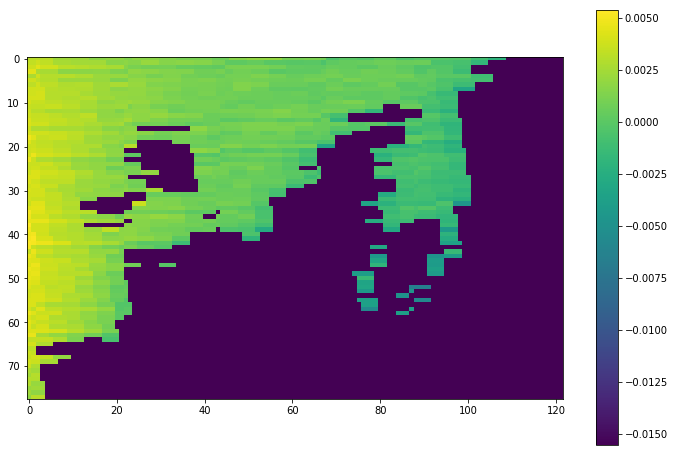

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(f[2])
plt.colorbar()
plt.show()

In [11]:
# processing
geolocation(mfiles_list, sbd_dom, final_path=save_path + '/g70')

/data/MODISa/LAC_OC/A2016357194000.L2_LAC_OC.x.nc


2016-12-22 19:40:10.094000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016357194000.L2_LAC_OC.x.nc


2016-12-22 19:40:10.094000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016069194000.L2_LAC_OC.x.nc
2016-03-09 19:40:09.986000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016318193000.L2_LAC_OC.x.nc
2016-11-13 19:30:10.526000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016311175000.L2_LAC_OC.x.nc


2016-11-06 17:50:09.680000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 

float32
/data/MODISa/LAC_OC/A2016310184000.L2_LAC_OC.x.nc


2016-11-05 18:40:10.422000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016318193500.L2_LAC_OC.x.nc


2016-11-13 19:35:10.380000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2017014180500.L2_LAC_OC.x.nc


2017-01-14 18:05:11.015000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2017014194500.L2_LAC_OC.x.nc


2017-01-14 19:45:11.046000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016069180000.L2_LAC_OC.x.nc
2016-03-09 18:00:09.955000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016334175500.L2_LAC_OC.x.nc


2016-11-29 17:55:10.583000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016334193500.L2_LAC_OC.x.nc
2016-11-29 19:35:10.615000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016318175500.L2_LAC_OC.x.nc


2016-11-13 17:55:10.349000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016315190000.L2_LAC_OC.x.nc


2016-11-10 19:00:10.631000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016310184500.L2_LAC_OC.x.nc


2016-11-05 18:45:10.276000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016357180000.L2_LAC_OC.x.nc
2016-12-22 18:00:10.062000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2017015185000.L2_LAC_OC.x.nc
2017-01-15 18:50:11.928000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016130191000.L2_LAC_OC.x.nc


2016-05-09 19:10:10.008000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016187190000.L2_LAC_OC.x.nc


2016-07-05 19:00:10.924000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016130173000.L2_LAC_OC.x.nc
2016-05-09 17:30:09.978000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016334193000.L2_LAC_OC.x.nc


2016-11-29 19:30:10.761000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016228185500.L2_LAC_OC.x.nc
2016-08-15 18:55:10.054000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016311192500.L2_LAC_OC.x.nc


2016-11-06 19:25:09.858000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


/data/MODISa/LAC_OC/A2016314182000.L2_LAC_OC.x.nc


2016-11-09 18:20:09.573000+00:00


index int32
Rrs_412 float32
Rrs_443 float32
Rrs_488 float32
Rrs_531 float32
Rrs_555 float32
Rrs_645 float32
Rrs_667 float32
Rrs_678 float32


array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)

/data/reprojected_data/MODISa/g70/A2016069194000.L2_LAC_OC.x.nc_reprojected.nc


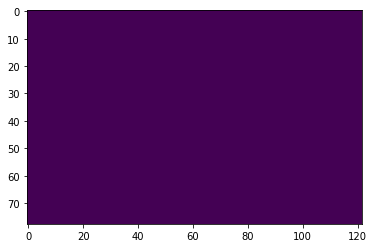

/data/reprojected_data/MODISa/g70/A2016357180000.L2_LAC_OC.x.nc_reprojected.nc


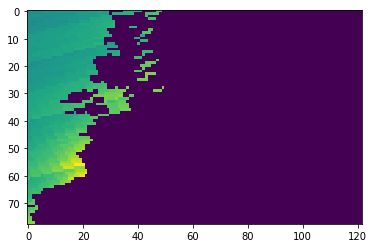

/data/reprojected_data/MODISa/g70/A2016187190000.L2_LAC_OC.x.nc_reprojected.nc


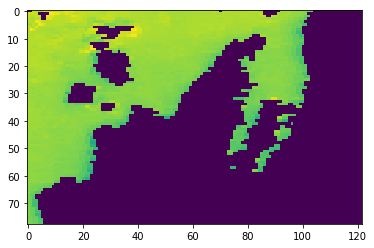

/data/reprojected_data/MODISa/g70/A2016318193000.L2_LAC_OC.x.nc_reprojected.nc


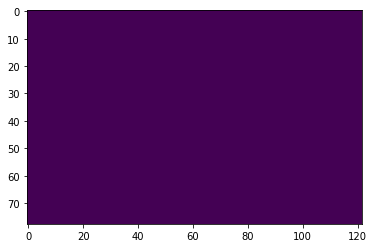

/data/reprojected_data/MODISa/g70/A2016130191000.L2_LAC_OC.x.nc_reprojected.nc


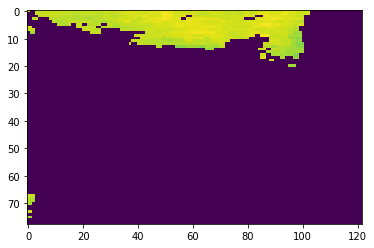

/data/reprojected_data/MODISa/g70/A2016334175500.L2_LAC_OC.x.nc_reprojected.nc


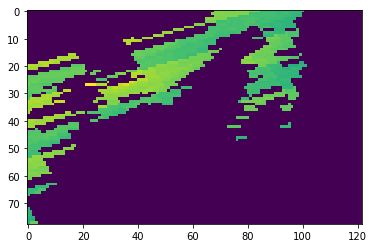

/data/reprojected_data/MODISa/g70/A2016311192500.L2_LAC_OC.x.nc_reprojected.nc


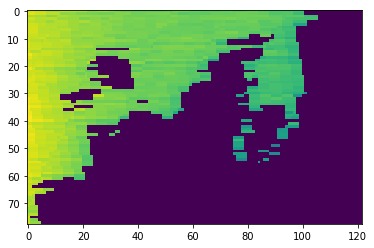

/data/reprojected_data/MODISa/g70/A2016130173000.L2_LAC_OC.x.nc_reprojected.nc


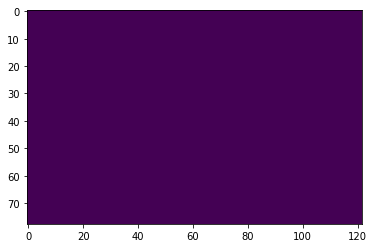

/data/reprojected_data/MODISa/g70/A2016318175500.L2_LAC_OC.x.nc_reprojected.nc


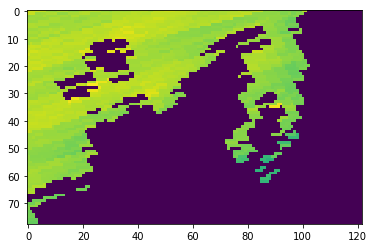

/data/reprojected_data/MODISa/g70/A2016334193000.L2_LAC_OC.x.nc_reprojected.nc


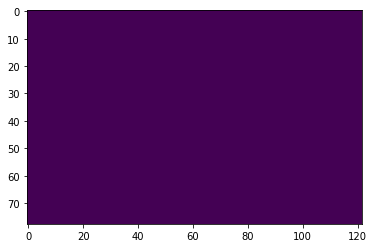

/data/reprojected_data/MODISa/g70/A2017014194500.L2_LAC_OC.x.nc_reprojected.nc


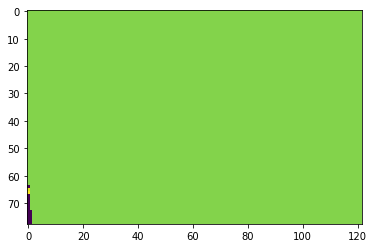

/data/reprojected_data/MODISa/g70/A2016069180000.L2_LAC_OC.x.nc_reprojected.nc


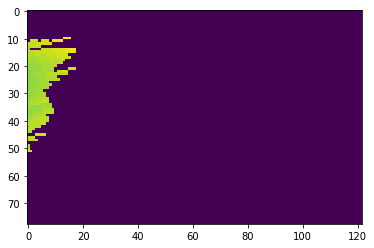

/data/reprojected_data/MODISa/g70/A2016315190000.L2_LAC_OC.x.nc_reprojected.nc


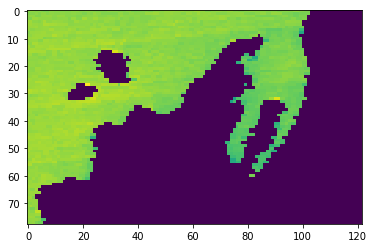

/data/reprojected_data/MODISa/g70/A2016310184000.L2_LAC_OC.x.nc_reprojected.nc


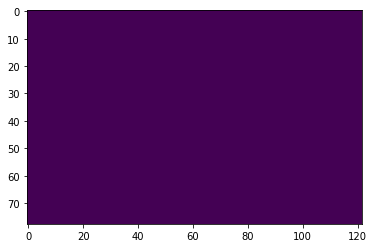

/data/reprojected_data/MODISa/g70/A2016318193500.L2_LAC_OC.x.nc_reprojected.nc


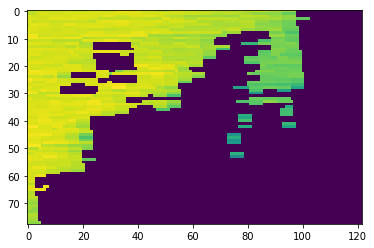

/data/reprojected_data/MODISa/g70/A2017014180500.L2_LAC_OC.x.nc_reprojected.nc


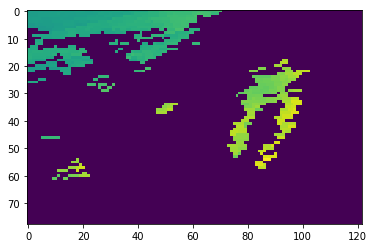

/data/reprojected_data/MODISa/g70/A2016334193500.L2_LAC_OC.x.nc_reprojected.nc


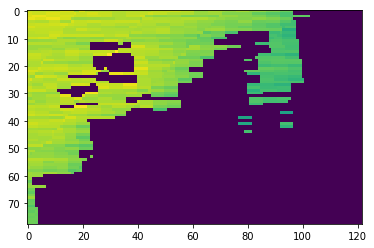

/data/reprojected_data/MODISa/g70/A2016228185500.L2_LAC_OC.x.nc_reprojected.nc


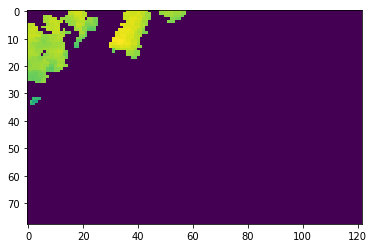

/data/reprojected_data/MODISa/g70/A2016311175000.L2_LAC_OC.x.nc_reprojected.nc


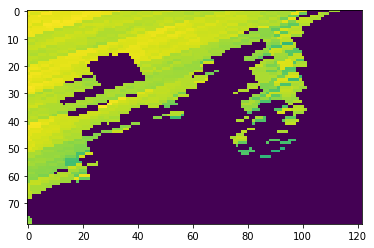

/data/reprojected_data/MODISa/g70/A2017015185000.L2_LAC_OC.x.nc_reprojected.nc


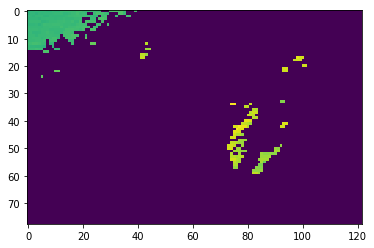

/data/reprojected_data/MODISa/g70/A2016357194000.L2_LAC_OC.x.nc_reprojected.nc


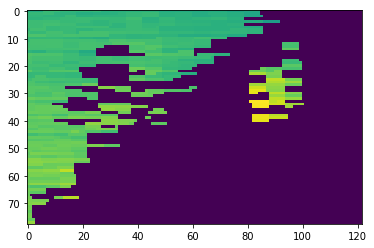

/data/reprojected_data/MODISa/g70/A2016310184500.L2_LAC_OC.x.nc_reprojected.nc


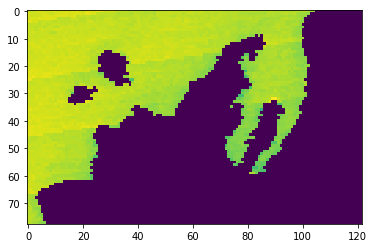

/data/reprojected_data/MODISa/g70/A2016314182000.L2_LAC_OC.x.nc_reprojected.nc


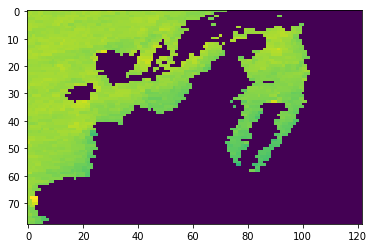

In [14]:
rep_mdata_list = glob('/data/reprojected_data/MODISa/g70/*')
for mf in rep_mdata_list:
    print mf
    plt.figure()
    n = Nansat(mf)
    plt.imshow(n[2])
    plt.show()

## TESTS

<IPython.core.display.Javascript object>


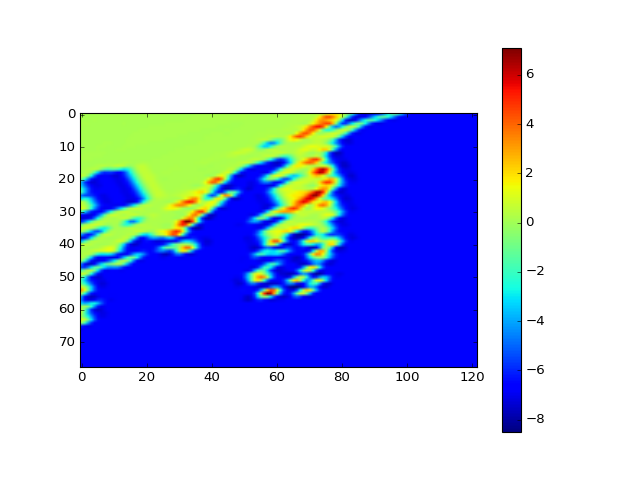

In [ ]:
# bad case 
n = Nansat('data/A2016311175000.L2_LAC_OC.x.nc')
%matplotlib nbagg
n.reproject(sbd_dom, eResampleAlg=2)
plt.figure()
plt.imshow(n[1])
plt.colorbar()
plt.show()

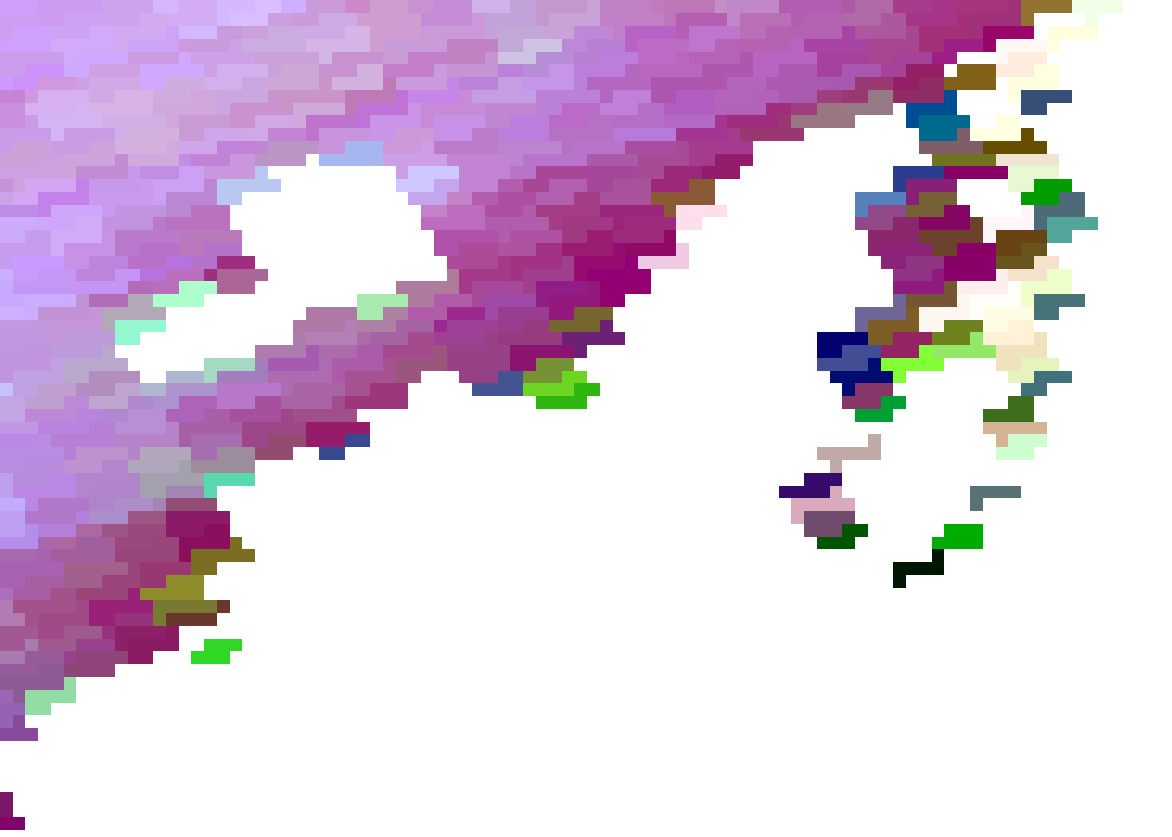

In [8]:
# reprojection by SeaDAS
from IPython.display import Image

Image(filename='data/A2016311175000_L2_LAC_OC_RGB.png')

<IPython.core.display.Javascript object>


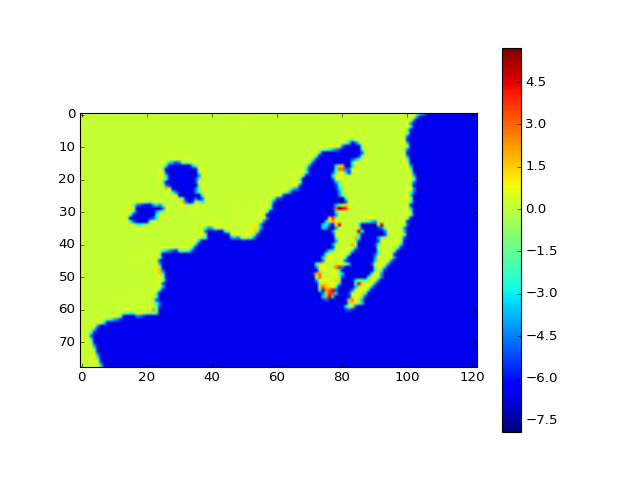

In [7]:
# good case
n = Nansat('data/A2016310184500.L2_LAC_OC.x.nc')
%matplotlib nbagg
n.reproject(sbd_dom, eResampleAlg=2)
plt.figure()
plt.imshow(n[1])
plt.colorbar()
plt.show()